### data set
1.fixed acidity : most acids involved with wine or fixed or nonvolatile.

2 volatile acidity : the amount of acetic acid in wine .

3 citric acid : found in small quantities, citric acid can add freshness and flavor to wines.

4 residual sugar: the amount of sugar remaining after fermentation stops.

5 chlorides : the amount of salt in the wine.

6 free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 total sulfur dioxide : amount of free and bound forms of S02; at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 density : the density of water that depending on the percent alcohol and sugar content.

9 pH : describes how acidic or basic a wine is on a scale from 0  to 14 .

10 sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 alcohol : the percent alcohol content of the wine

12 quality : output variable (based on sensory data, score between 3 and 8)


## Contents
[1-import libariers and data](#1--import-libariers-and-data).

[2-data review & understanding data](#2--data-review-&-understanding-data).

[3-data cleaning and exploring](#3--data-cleaning-and-exploring)

   * [3.1-deal with null values and duplicated rows](#3.1--deal-with-nulls-and-duplicated-rows)
   * [3.2-Univariate analysis](#3.2--Univariate-analysis)
        * [3.2.1- explore numerical data](#3.2.1--explore-numerical-data)
   * [3.3- Handling outliers and skewness](#3.3--Handling-with-outliers-and-skewness)
        * [3.3.1- handle with outliers](#3.3.1--handle-with-outliers)
        * [3.3.2- handle with skewness](#3.3.2--handle-with-skewness)
        
   * [3.4- Bivariate analysis](#3.4--Bivariate-analysis)    

[4- build a model](#4--build-a-model)
   * [4.1- split data](#4.1--split-data)
   * [4.2- Iterate](#4.2--Iterate)
   * [4.3- Evaluate](#4.3--Evaluate)
   * [4.4- Communicate](#4.4--Communicate)

## 1- import libariers and data

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette("Spectral")

In [2]:
data= pd.read_csv(r"C:\Users\tawfi\Downloads\winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2- data review & understanding data

In [3]:
def data_review(df):
    
    # shape of data
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns . \n")
    

    # Get the number of columns of each data type
    print(df.dtypes)
    print(f"""\n
    Number of float features: {len(df.select_dtypes('float').columns)}
    Number of int features: {len(df.select_dtypes('int').columns)}
    Number of object features: {len(df.select_dtypes('object').columns)}
    
    """)    

    # check about missing values
    print("\n" + 10 * "-" + "Missing Values".center(20) + 10 * "-"+"\n")
    print(df.isna().sum()/len(df))
    print(f"\n the number of all missing values in data equal : { df.isna().sum().sum()}")
    
    # check about duplicated rows
    print(f"\n there are {df.duplicated().sum()} duplicated rows")
    

In [4]:
data_review(data)

Dataset has 1599 rows and 12 columns . 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


    Number of float features: 11
    Number of int features: 1
    Number of object features: 0
    
    

----------   Missing Values   ----------

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

 the number of all missing values in data equal : 0

 ther

In [5]:
def describe_cat_or_num_columns(df , columns=None):
    
    if columns is None: 
        columns = df.columns
    

    for col in columns :
        
        if df[col].dtype in ['int64', 'float64']:
            print(5* "-" + col.center(20) + 5 * "-")
            print(f'''
            the "{col}" std = {df[col].std():.2f}
            mean = {df[col].mean():.2f}
            median = {df[col].median():.2f}
            ''')
            
        elif df[col].dtype in ["object"]:
            print("\n" + 5* "-" + col .center(20) + 5 * "-"+"\n")
            print(df[col].value_counts())
    

In [6]:
describe_cat_or_num_columns(data)

-----   fixed acidity    -----

            the "fixed acidity" std = 1.74
            mean = 8.32
            median = 7.90
            
-----  volatile acidity  -----

            the "volatile acidity" std = 0.18
            mean = 0.53
            median = 0.52
            
-----    citric acid     -----

            the "citric acid" std = 0.19
            mean = 0.27
            median = 0.26
            
-----   residual sugar   -----

            the "residual sugar" std = 1.41
            mean = 2.54
            median = 2.20
            
-----     chlorides      -----

            the "chlorides" std = 0.05
            mean = 0.09
            median = 0.08
            
-----free sulfur dioxide -----

            the "free sulfur dioxide" std = 10.46
            mean = 15.87
            median = 14.00
            
-----total sulfur dioxide-----

            the "total sulfur dioxide" std = 32.90
            mean = 46.47
            median = 38.00
            
-----      densit

***Data Observations :***

* mean value and median of PH , denisity are equal , they are normal distributions.
* mean value for quality column (target) is smaller than value of median.
* Mean value for other columns is larger than 50th percentile(median).that's mean those have right skewed distributation .

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3- data cleaning and exploring
1- deal with nulls and duplicated rows

2- Univariate analysis

3- Handling outliers and skewness

4- Bivariate analysis

### 3.1- deal with nulls and duplicated rows
create function that drops duplicated rows . drops null values if `drop_na` argument is **True** and fills the nulls with Suitable value.

In [8]:
def deal_with_nulls_and_duplicates( df , drop_na = False ):
    
    # handle with missing data 
    if drop_na is True:
        df.dropna(inplace=True)
    
    else:
        for col in df.columns:
        
            # drop columns that are more than half nan-values.
            if df[col].isna().sum()/len(df) > 0.5 :
                df.drop(columns=col , inplace = True)
        
            # fill nulls .
            elif df[col].dtype =="float":
                df[col] = df[col].fillna(df[col].mean())
            
            elif df[col].dtype =="int":
                df[col] = df[col].fillna(df[col].median())
            
            elif df[col].dtype =="object":
                df[col] = df[col].fillna(df[col].mode())
            
    # remove duplicated rows.
    df.drop_duplicates(inplace=True)
    
    return df

In [9]:
data = deal_with_nulls_and_duplicates(data ,drop_na= False)

### 3.2- Univariate analysis

3.2.1- explore numerical data

3.2.2- explore target column

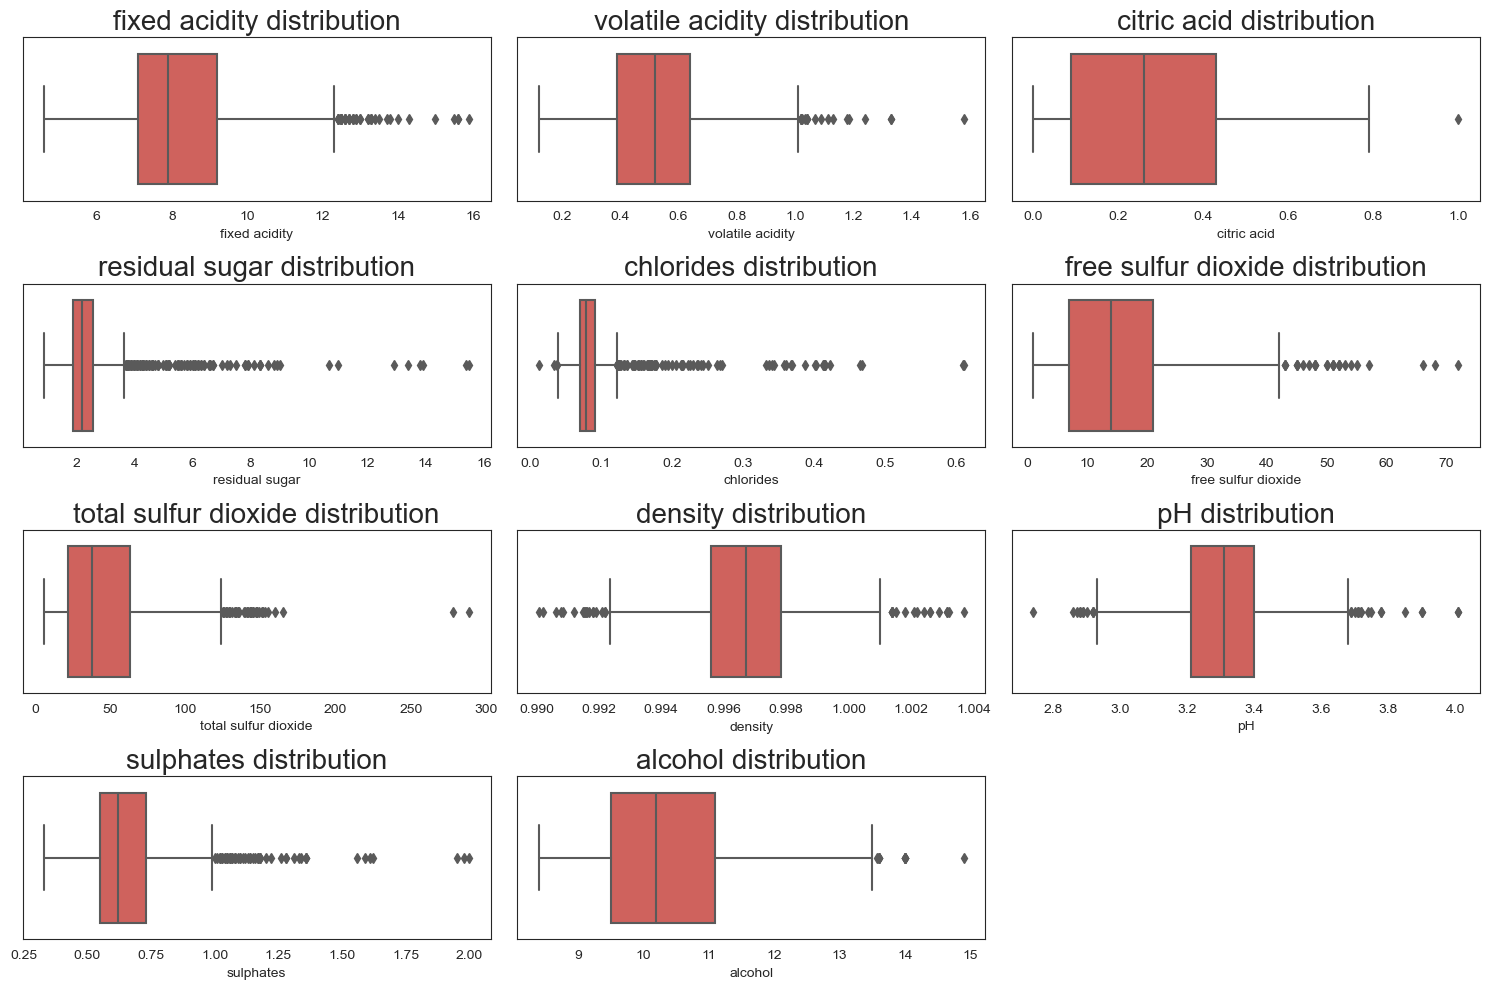

In [10]:
num_columns = data.select_dtypes(include=['number']).drop(columns="quality").columns

#boxplot
sns.set_style("white")
plt.figure(figsize=(15, 10))

i=1 
for col in num_columns:
    
    plt.subplot(4, 3, i)
    sns.boxplot(data=data, x=col, palette=palette)
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()

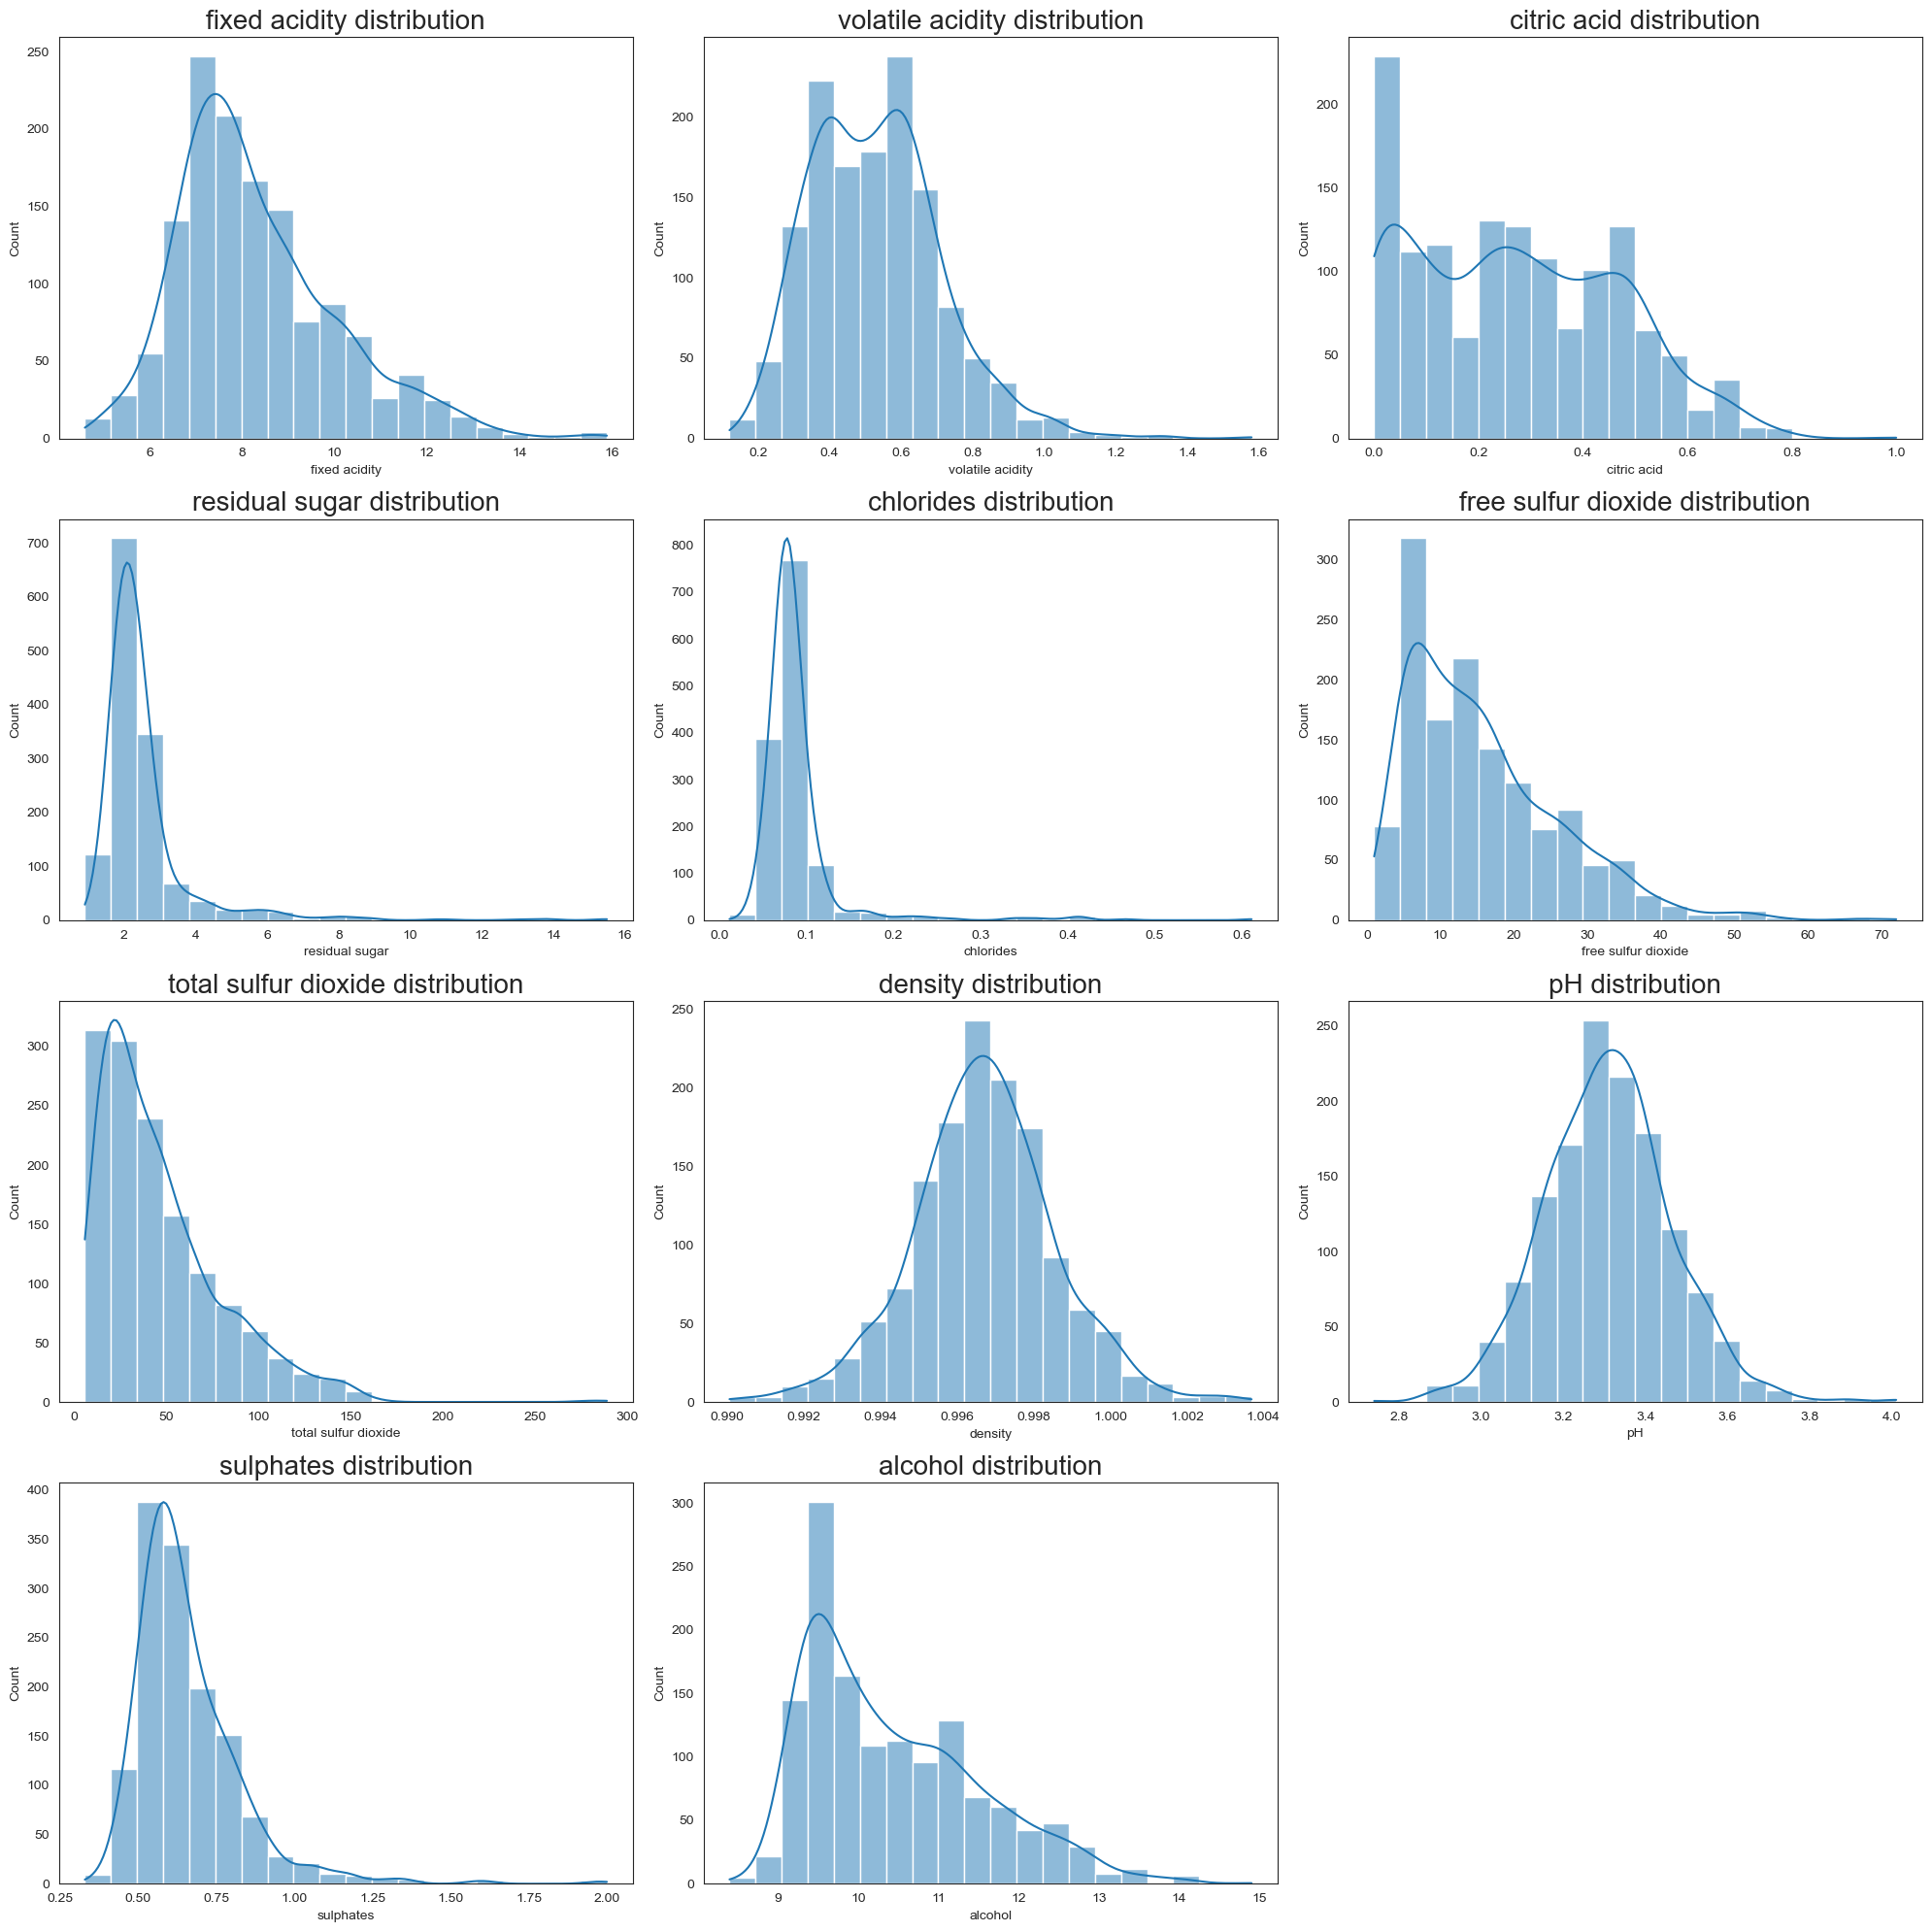

In [11]:
#histgram
sns.set_style("white")
plt.figure(figsize=(20, 20))

i=1 
for col in num_columns:
    
    plt.subplot(4, 3, i)
    sns.histplot(data=data, x=col, kde=True, bins=20, multiple="stack", alpha=.5 ,palette=palette)  
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()

In [12]:
def chart_plot(df, feature):
    
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])



the skewness value of pH column = 0.23


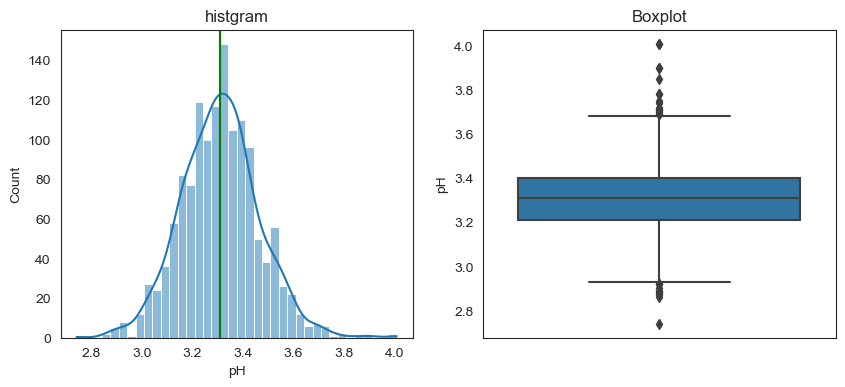

In [13]:
chart_plot(data,"pH")

***Data Observations :***
* fixed acidity looks normal but although its a bit right skewed, similarly with some other features like **sulphates, chlorides.**
* **Density** and **pH** looks normally distributed
* Some features are not normal as well like **alcohol, citric acid**.

### 3.3-  Handling outliers and skewness

#### 3.3.1- handle with outliers
we create function that can deal with outliers by replace outliers with median or mean based on feature's data ,
or droping outliers .

**residual sugar** and **chlorides** columns have alot of outliers and that is reason of skewness . if outliers are replaced , skewness disappeared . 

In [14]:
def deal_with_outliers(df , columns = None):
    
    if columns is None:
        columns = df.select_dtypes(include=['number']).drop(columns= "quality").columns

    for col in columns:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        # replace the outliers with the lower/upper bound with the median or mean of the column
        if df[col].dtype =="int":
            
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].median(), inplace=True)
            
        elif df[col].dtype =="float":
            
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].mean(), inplace=True)
            
    return df.head()

In [15]:
deal_with_outliers(data,columns=['residual sugar','chlorides','volatile acidity'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


the skewness value of chlorides column = 0.23


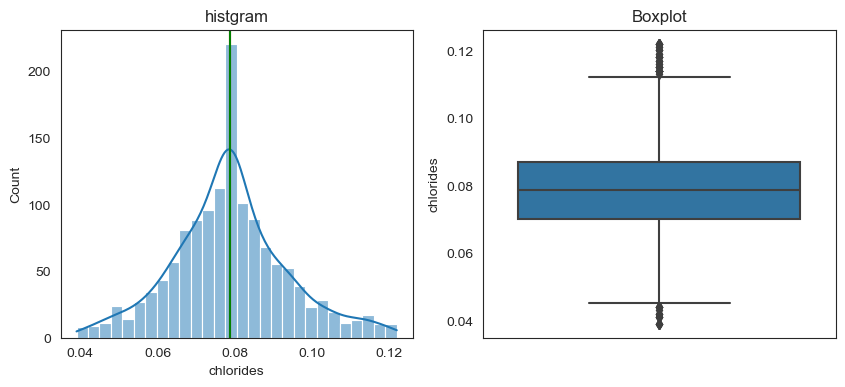

In [16]:
# check
chart_plot(data,'chlorides')

#### 3.3.2- handle with skewness


##### transfrom data :
we will use **log transformer** technique . it is used to reduce the impect of outliers and skewness

there are four columns that need to be transformed **'total sulfur dioxide','fixed acidity','free sulfur dioxide','sulphates'** and **'alcohol'**

In [17]:
for col in ['fixed acidity','total sulfur dioxide','free sulfur dioxide','sulphates','alcohol']:
    data[col]=np.log(data[col])

the skewness value of sulphates column = 0.96


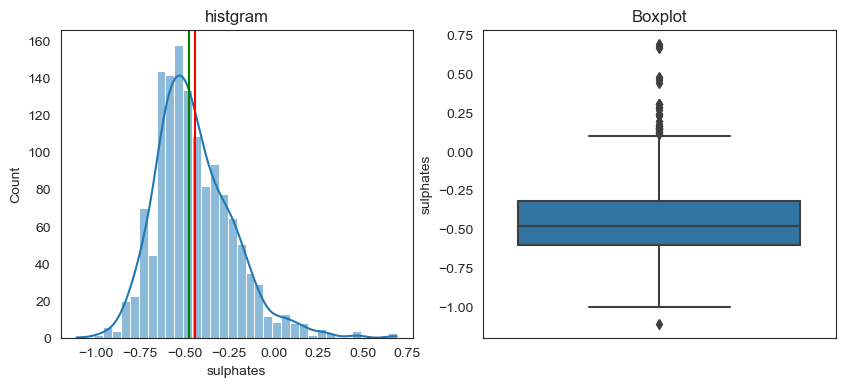

In [18]:
chart_plot(data,'sulphates')

### 3.4- Bivariate analysis
we will use heatmap and pairplot to know the rlationships between features 
and check if there is multicollinearity or not

<AxesSubplot:>

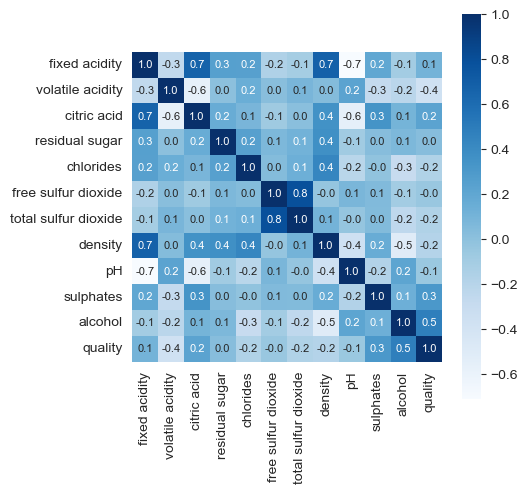

In [19]:
plt.figure(figsize=(5,5))
corr=data.corr()
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

####  explore target column

In [20]:
data["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

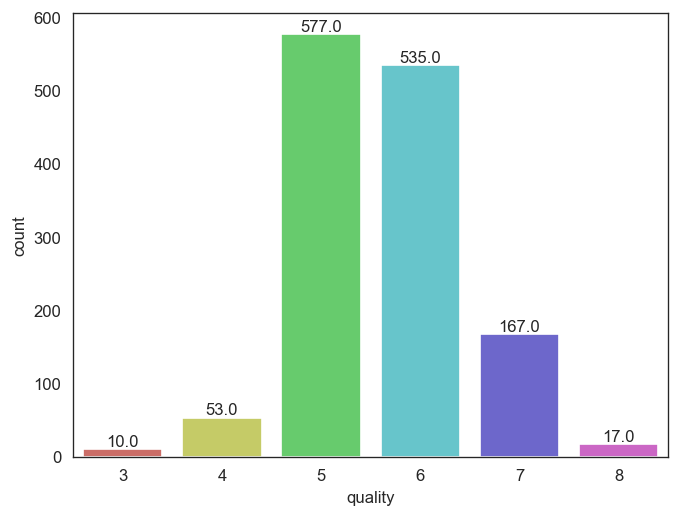

In [21]:
plt.figure(dpi=120)
ax = sns.countplot(data=data, x='quality',palette="hls")
ax.bar_label(ax.containers[0], fmt='%.1f');

create binary target with 0 (bad quality) and 1 (good quality)

In [22]:
data["quality"] = (data["quality"] > 6.5).astype(int)

data["quality"].value_counts()

0    1175
1     184
Name: quality, dtype: int64

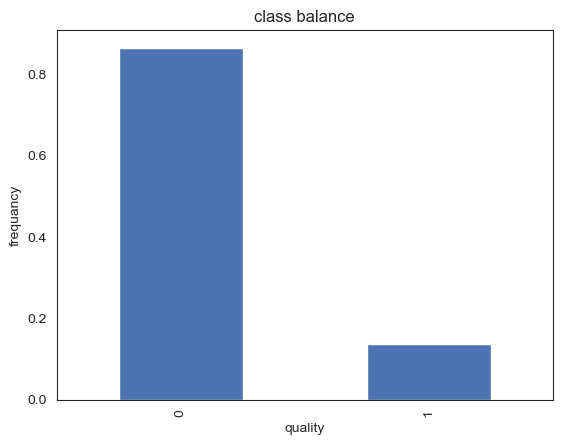

In [23]:
# Plot class balance
plt.style.use('seaborn-deep')
data["quality"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("quality")
plt.ylabel("frequancy")
plt.title("class balance");

Now that we have our data set up the right way, we can build the model

## 4- build a model

1- split data

2- Iterate

3- evaluate

4- Communicate Results

### 4.1- split data

In [24]:
target = "quality"
X = data.drop(columns=target)
y = data[target]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y ,
    test_size=0.2,
    random_state=42
)

In [26]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1087, 11)
y_train shape: (1087,)
X_test shape: (272, 11)
y_test shape: (272,)


### 4.2- Iterate

**Ensemble models** work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction. Since we used a decision tree in the last lesson, we're going to create an ensemble of trees here. This type of model is called a **random forest**.


In [28]:
RF_classifer = RandomForestClassifier()
RF_classifer.fit(X_train,y_train)

RF_y_pred = RF_classifer.predict(X_test)

print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(y_test, RF_y_pred)))

Model accuracy score with criterion entropy: 91.18%


By default, the number of trees in our forest (n_estimators) is set to 100. That means when we train this classifier, we'll be fitting 100 trees. While it will take longer to train, it will hopefully lead to better performance.

In order to get the best performance from our model, we need to tune its hyperparameter. But how can we do this if we haven't created a validation set? The answer is cross-validation. So, before we look at hyperparameters, let's see how cross-validation works with the classifier we just built.

### Hyperparameter Tuning ###

####  Cross-Validation 

This approach makes the best use of all the data we are given, so it's particularly useful when the sample size is small.
*  **k-fold CV** is the most used cross validation method.The algorithm divides the training set into $k$ small folds. For each fold $k$, we:
1. Train the model using all the folds but one (i.e. $k-1$ folds) as training data;

1. Validate the model using the remaining fold as if it were test data, and store the performance metric;


 Perform cross-validation with your classifier. We want five folds, so set cv to 5. We also want to speed up training, to set n_jobs to -1.

In [29]:
cv_acc_scores = cross_val_score(RF_classifer ,X_train ,y_train ,cv = 5 ,n_jobs=-1)
print(cv_acc_scores)

[0.8853211  0.87155963 0.88479263 0.85253456 0.87096774]


Now that we have an idea of how cross-validation works, let's tune our model. The first step is creating a range of hyperparameters that we want to evaluate. And Create a `GridSearchCV` named `model` that includes your classifier and hyperparameter grid.

In [30]:
#our hyperparameter grid
params = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)  
}
model = GridSearchCV(
    RF_classifer,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [31]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [32]:
#Extract the cross-validation results from model and load them into a DataFrame named cv_results.

cv_results = pd.DataFrame(model.cv_results_)
print(len(cv_results))
cv_results.head()

12


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074684,0.003498,0.007181,0.001696,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.889908,0.862385,0.894009,0.852535,0.870968,0.873961,0.015864,1
1,0.146252,0.010352,0.009978,0.000347,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.876147,0.853211,0.889401,0.838710,0.861751,0.863844,0.017628,10
2,0.249080,0.016485,0.018821,0.002079,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.871560,0.853211,0.884793,0.847926,0.880184,0.867535,0.014586,7
3,0.082003,0.004368,0.009002,0.002001,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.876147,0.839450,0.880184,0.847926,0.866359,0.862013,0.015852,12
4,0.159469,0.005225,0.011515,0.001863,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.880734,0.853211,0.894009,0.843318,0.880184,0.870291,0.018914,4


In addition to the accuracy scores for all the different models we tried during our grid search, we can see how long it took each model to train. Let's take a closer look at how different hyperparameter settings affect training time.

let's only look at models where max_depth equals 10.

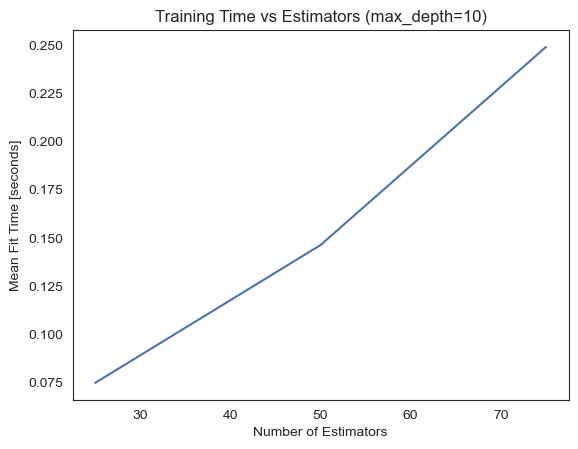

In [33]:
# Create mask
mask = cv_results["param_max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

* The higher number of estimator, the higher mean fit time

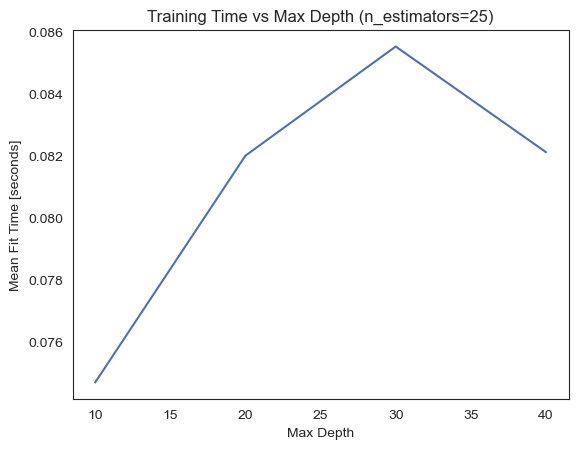

In [34]:
# Create mask
mask = cv_results["param_n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

Finally, let's look at the hyperparameters that led to the best performance. 

In [35]:
# Extract best hyperparameters
print(model.best_params_)
print("-------------")
print(model.best_score_)
print("-------------")
print(model.best_estimator_)

{'max_depth': 10, 'n_estimators': 25}
-------------
0.8739610197437957
-------------
RandomForestClassifier(max_depth=10, n_estimators=25)


### 4.3- Evaluate

In [36]:
#Calculating the training and test accuracy scores for model.
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9936
Test Accuracy: 0.9118


Next, we're going to use a confusion matrix to see how our model performs. To better understand the values we'll see in the matrix, let's first count how many observations in our test set belong to the positive and negative classes

In [38]:
y_test.value_counts()

0    238
1     34
Name: quality, dtype: int64

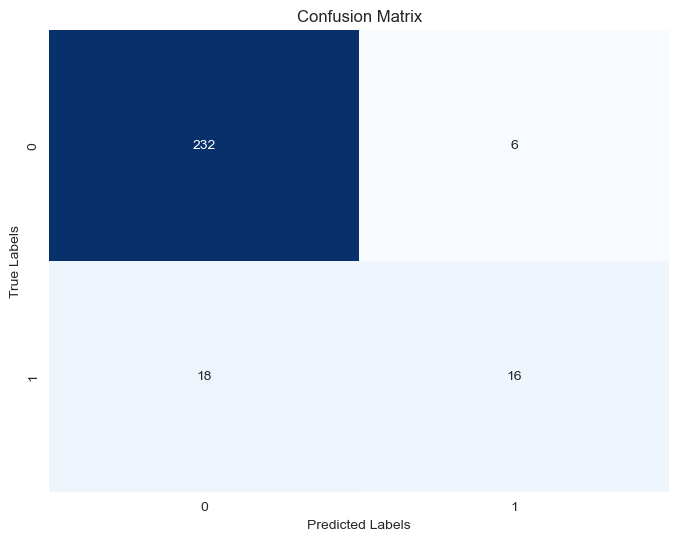

In [46]:
# Create a confusion matrix
cm = confusion_matrix(y_test,model.predict(X_test))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

If you sum the values in the bottom row, you get the total number of positive observations in y_test ( 18+16=34). And the top row sum to the number of negative observations ( 232+6=238).

In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test,model.predict(X_test))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, model.predict(X_test), average='weighted')
recall = recall_score(y_test, model.predict(X_test), average='weighted')
f1 = f1_score(y_test, model.predict(X_test), average='weighted')

# Create a classification report
report = classification_report(y_test, model.predict(X_test))




# Print evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

# Print classification report
print("Classification Report:\n", report)

Accuracy: 0.9118
Precision: 0.9029
Recall: 0.9118
F1-score: 0.9034
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       238
           1       0.73      0.47      0.57        34

    accuracy                           0.91       272
   macro avg       0.83      0.72      0.76       272
weighted avg       0.90      0.91      0.90       272



### 4.4- Communicate

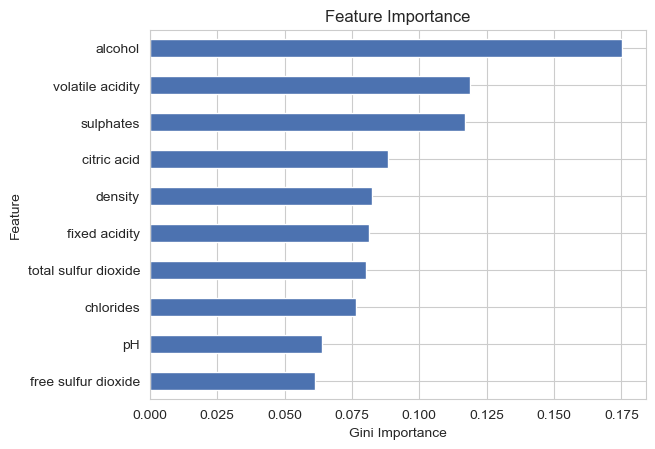

In [47]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()

# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

If you have come this far, Congratulations!!


If this notebook helped you in any way or you liked it, please upvote and/or leave a comment!! :)